<a href="https://www.kaggle.com/code/nerminmostafa/lenet-5-cnn-architecture?scriptVersionId=160038434" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **What is Lenet5?**
Lenet-5 is one of the earliest pre-trained models proposed by Yann LeCun and others in the year 1998, in the research paper Gradient-Based Learning Applied to Document Recognition. They used this architecture for recognizing the handwritten and machine-printed characters.

# **The Architecture of the Model**
The LeNet-5 architecture consists of two sets of convolutional and average pooling layers, followed by a flattening convolutional layer, then two fully-connected layers and finally a softmax classifier.

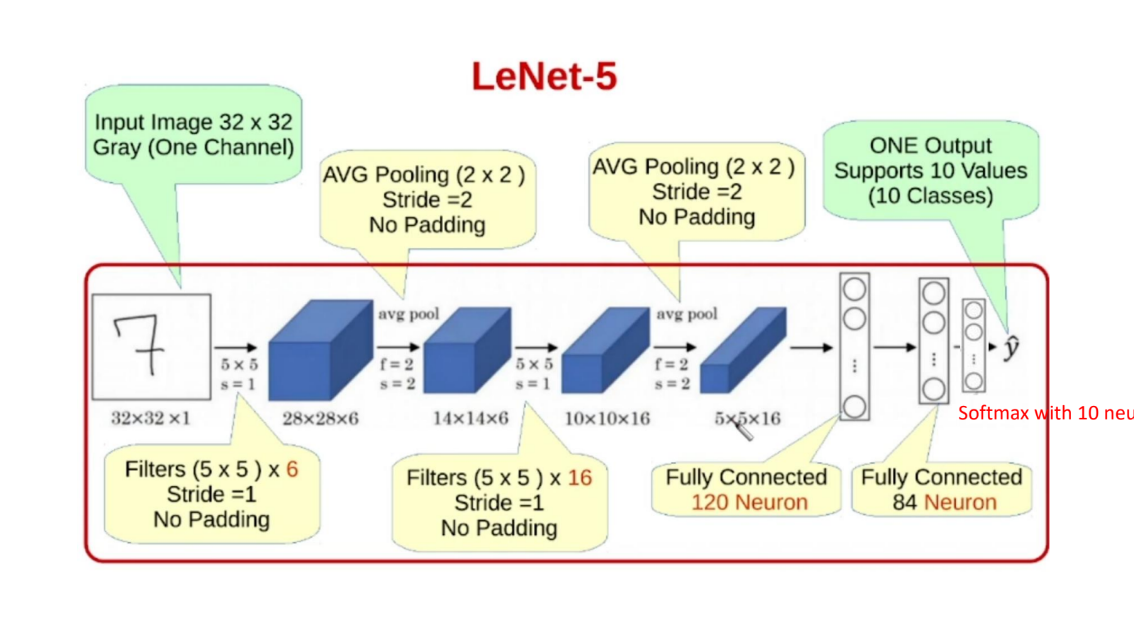

# Importing Libraries

In [1]:
import numpy as np
import seaborn as sns
import tensorflow as tf
from keras import datasets, layers, models, Sequential
from keras.layers import Dense, Activation, Dropout, Input, Conv2D, MaxPooling2D, Flatten, ReLU, AveragePooling2D
from keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
from keras.utils import plot_model
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# **MNIST Dataset**
- Description: The MNIST dataset consists of 28x28 grayscale images of handwritten digits (0-9).

### Load data

In [37]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [38]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)


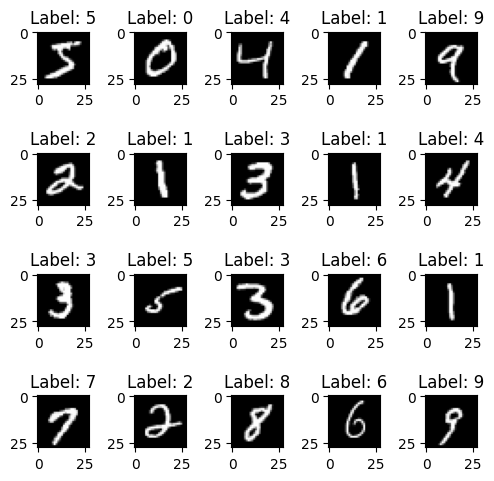

In [40]:
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(5, 5))
axs = axs.flatten()

for i in range(20):
    img = train_images[i]
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title("Label: {}".format(train_labels[i]))

plt.tight_layout()
plt.show()

### Pre-processing

In [41]:
train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)

train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### LeNet-5 Architecture

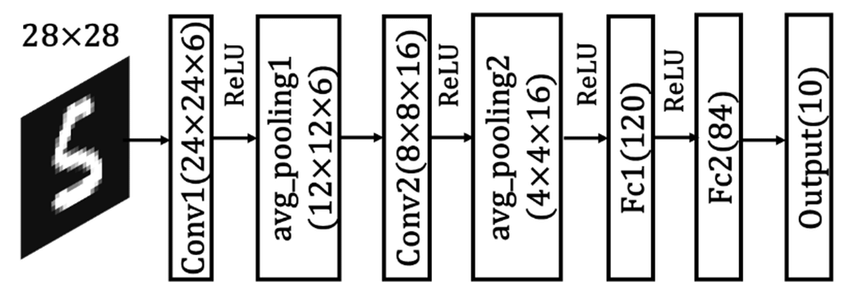

In [42]:
model1 = Sequential()

# First Convolutional Layer
# Input = (28, 28, 1)
# Output = [(28 + 0 - 5) / 1] + 1 = (24, 24, 6)
model1.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28, 28, 1), name='Conv1'))

# Input = (24, 24, 6)
# Output = [(24 + 0 - 2) / 2] + 1 = (12, 12, 6)
model1.add(AveragePooling2D(pool_size=(2, 2), name='AvgPool1'))

# Second Convolutional Layer
# Input = (12, 12, 6)
# Output = [(12 + 0 - 5) / 1] + 1 = (8, 8, 16)
model1.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu', name='Conv2'))

# Input = (8, 8, 16)
# Output = [(8 + 0 - 2) / 2] + 1 = (4, 4, 16)
model1.add(AveragePooling2D(pool_size=(2, 2), name='AvgPool2'))

# Input = (4, 4, 16)
# Output = 4 * 4 * 16 = 256
model1.add(Flatten())                         # Input Layer of neural network
model1.add(Dense(120, activation='relu'))     # Hidden Layer (Fully Connected Layer 1)
model1.add(Dense(84, activation='relu'))      # Hidden Layer (Fully Connected Layer 2)
model1.add(Dense(10, activation='softmax'))   # Output Layer

In [43]:
model1.summary()

Model: "sequential_2"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 Conv1 (Conv2D)              (None, 24, 24, 6)         156       

                                                                 

 AvgPool1 (AveragePooling2D  (None, 12, 12, 6)         0         

 )                                                               

                                                                 

 Conv2 (Conv2D)              (None, 8, 8, 16)          2416      

                                                                 

 AvgPool2 (AveragePooling2D  (None, 4, 4, 16)          0         

 )                                                               

                                                                 

 flatten_2 (Flatten)         (None, 256)               0         

                                                                 

 dense_6 (Dense)             (None, 12

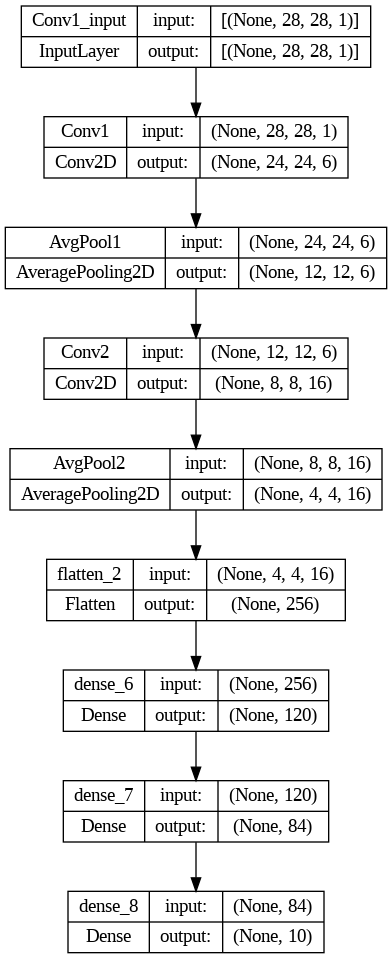

In [44]:
plot_model(model1, show_shapes=True, to_file='MNIST_LeNet5.png')

In [45]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
model1_history = model1.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

Epoch 1/10

1875/1875 [==============================] - 10s 5ms/step - loss: 0.2094 - accuracy: 0.9418 - val_loss: 0.0739 - val_accuracy: 0.9763

Epoch 2/10

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0655 - accuracy: 0.9803 - val_loss: 0.0516 - val_accuracy: 0.9817

Epoch 3/10

1875/1875 [==============================] - 8s 5ms/step - loss: 0.0525 - accuracy: 0.9837 - val_loss: 0.0629 - val_accuracy: 0.9829

Epoch 4/10

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0429 - accuracy: 0.9867 - val_loss: 0.0440 - val_accuracy: 0.9866

Epoch 5/10

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0380 - accuracy: 0.9884 - val_loss: 0.0380 - val_accuracy: 0.9901

Epoch 6/10

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0324 - accuracy: 0.9899 - val_loss: 0.0399 - val_accuracy: 0.9881

Epoch 7/10

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0282 - accuracy: 0.9912 - val_loss: 0.0405 -

## Make Predictions

In [47]:
model1_perdict = model1.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [48]:
model1_perdict = [np.argmax(arr) for arr in model1_perdict]
mnist_ytest = [np.argmax(arr) for arr in test_labels]

In [49]:
print('Predicted:  ', np.array(model1_perdict))
print('Test labels:', np.array(mnist_ytest))

Predicted:   [7 2 1 ... 4 5 6]

Test labels: [7 2 1 ... 4 5 6]


## Evaluate Model

In [50]:
model1.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0489 - accuracy: 0.9874


[0.048940010368824005, 0.9873999953269958]

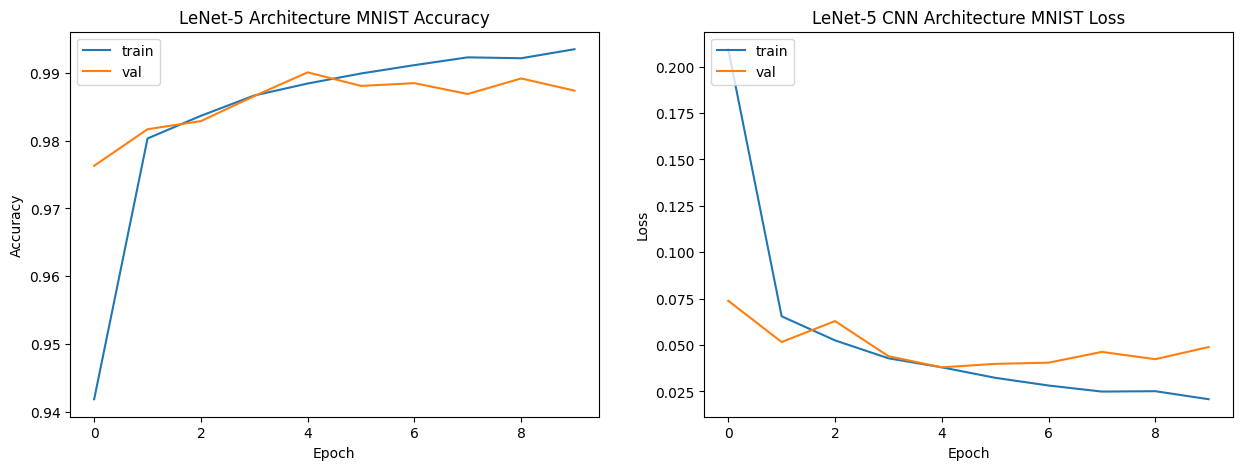

In [53]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(model1_history.history['accuracy'])
plt.plot(model1_history.history['val_accuracy'])
plt.title('LeNet-5 Architecture MNIST Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(model1_history.history['loss'])
plt.plot(model1_history.history['val_loss'])
plt.title('LeNet-5 CNN Architecture MNIST Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [54]:
print('Accuracy Score =',round(np.max(model1_history.history['val_accuracy']) * 100, 2) , '%')

Accuracy Score = 99.01 %


## Confusion Matrix

In [55]:
rounded_labels = np.argmax(test_labels, axis=1)
cm1 = confusion_matrix(rounded_labels, model1_perdict)
print(cm1)

[[ 974    0    0    0    0    1    1    3    1    0]

 [   0 1131    1    1    0    0    0    1    1    0]

 [   1    1 1025    1    0    0    0    3    0    1]

 [   0    0    1 1003    0    2    0    3    1    0]

 [   0    1    2    0  975    0    0    0    0    4]

 [   2    0    1    8    0  873    4    2    0    2]

 [   6    4    1    0    2    0  942    0    3    0]

 [   0    2    7    1    0    0    0 1014    0    4]

 [   5    0    9    9    0    3    0    0  945    3]

 [   0    1    0    0    8    3    1    3    1  992]]


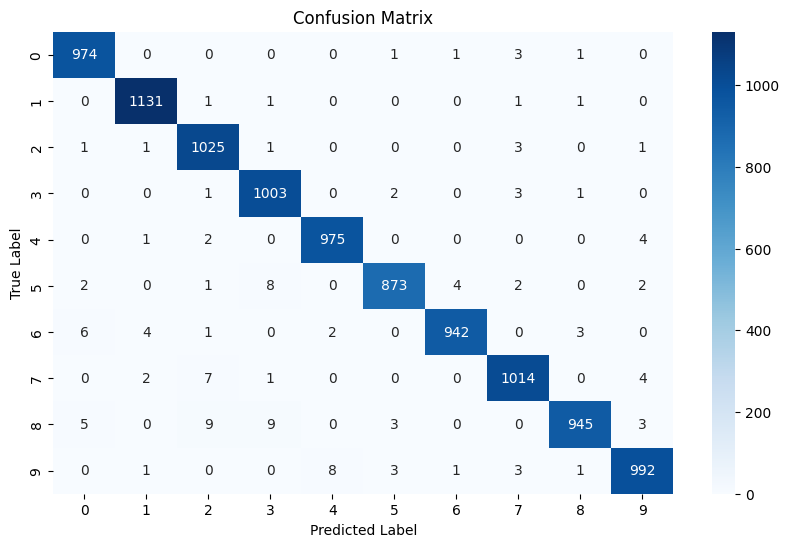

In [61]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [62]:
print(classification_report(rounded_labels, model1_perdict))

              precision    recall  f1-score   support



           0       0.99      0.99      0.99       980

           1       0.99      1.00      0.99      1135

           2       0.98      0.99      0.99      1032

           3       0.98      0.99      0.99      1010

           4       0.99      0.99      0.99       982

           5       0.99      0.98      0.98       892

           6       0.99      0.98      0.99       958

           7       0.99      0.99      0.99      1028

           8       0.99      0.97      0.98       974

           9       0.99      0.98      0.98      1009



    accuracy                           0.99     10000

   macro avg       0.99      0.99      0.99     10000

weighted avg       0.99      0.99      0.99     10000




# **CIFAR-10 Dataset**
- Description: The CIFAR datasets contain 32x32 color images it has 10 classes.

### Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 26s 0us/step


In [10]:
print("Train Images Shape: ", x_train.shape)
print("Test Images Shape:  ", x_test.shape)
print("Train Labels Shape: ", y_train.shape)
print("Test Labels Shape:  ", y_test.shape)

Train Images Shape:  (50000, 32, 32, 3)

Test Images Shape:   (10000, 32, 32, 3)

Train Labels Shape:  (50000, 10)

Test Labels Shape:   (10000, 10)


In [4]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

### Pre-Processing

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

### Normalize pixel values to be between 0 and 1

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

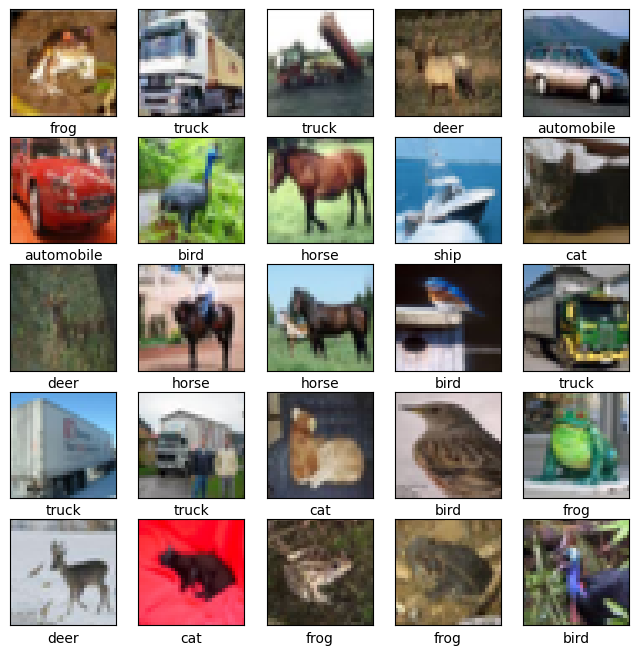

In [65]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

- Converting Cifar10 dataset labels vector to categorical data matrix of binary values (either ‘1’ or ‘0’). It has number of rows equal to the length of the input vector and number of columns equal to the number of classes.

In [9]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

### LeNet-5 Architecture on CIFAR-10 Dataset

In [11]:
model2 = Sequential()

# First Convolutional Layer
# Input = (32, 32, 3)
# Output = [(32 + 0 - 5) / 1] + 1 = (28, 28, 6)
model2.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(32, 32, 3)))

# Input = (28, 28, 6)
# Output = [(28 + 0 - 2) / 2] + 1 = (14, 14, 6)
model2.add(AveragePooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
# Input = (14, 14, 6)
# Output = [(14 + 0 - 5) / 1] + 1 = (10, 10, 16)
model2.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))

# Input = (10, 10, 16)
# Output = [(10 + 0 - 2) / 2] + 1 = (5, 5, 16)
model2.add(AveragePooling2D(pool_size=(2, 2)))

# Input = (5, 5, 16)
# Output = 5 * 5 * 16 = 400
model2.add(Flatten())                         # Input Layer of neural network
model2.add(Dense(120, activation='relu'))     # Hidden Layer (Fully Connected Layer 1)
model2.add(Dense(84, activation='relu'))      # Hidden Layer (Fully Connected Layer 2)
model2.add(Dense(10, activation='softmax'))   # Output Layer

### LeNet-5 architecture, number of trainable parameters in each layer

In [12]:
model2.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 28, 28, 6)         456       

                                                                 

 average_pooling2d (Average  (None, 14, 14, 6)         0         

 Pooling2D)                                                      

                                                                 

 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      

                                                                 

 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         

 gePooling2D)                                                    

                                                                 

 flatten (Flatten)           (None, 400)               0         

                                                                 

 dense (Dense)               (None, 120)

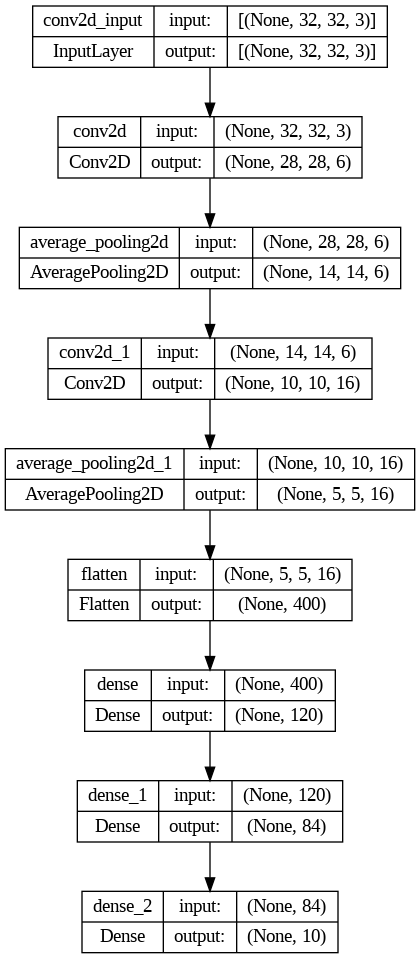

In [13]:
plot_model(model2, show_shapes=True, to_file='CIFAR10_LeNet5.png')

### Compile the model

In [14]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train Model

In [15]:
cifar_history = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10

1563/1563 [==============================] - 15s 7ms/step - loss: 1.6311 - accuracy: 0.4061 - val_loss: 1.4236 - val_accuracy: 0.4878

Epoch 2/10

1563/1563 [==============================] - 9s 6ms/step - loss: 1.3498 - accuracy: 0.5149 - val_loss: 1.2986 - val_accuracy: 0.5202

Epoch 3/10

1563/1563 [==============================] - 7s 5ms/step - loss: 1.2500 - accuracy: 0.5531 - val_loss: 1.2188 - val_accuracy: 0.5656

Epoch 4/10

1563/1563 [==============================] - 8s 5ms/step - loss: 1.1781 - accuracy: 0.5807 - val_loss: 1.1919 - val_accuracy: 0.5767

Epoch 5/10

1563/1563 [==============================] - 7s 4ms/step - loss: 1.1216 - accuracy: 0.6000 - val_loss: 1.1641 - val_accuracy: 0.5778

Epoch 6/10

1563/1563 [==============================] - 13s 8ms/step - loss: 1.0684 - accuracy: 0.6197 - val_loss: 1.1531 - val_accuracy: 0.5913

Epoch 7/10

1563/1563 [==============================] - 12s 8ms/step - loss: 1.0155 - accuracy: 0.6394 - val_loss: 1.1360

### Make Predictions

In [16]:
model2_perdict = model2.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [17]:
model2_perdict = [np.argmax(arr) for arr in model2_perdict]
cifar_ytest = [np.argmax(arr) for arr in y_test]

In [18]:
print('Predicted:  ', np.array(model2_perdict))
print('Test labels:', np.array(cifar_ytest))

Predicted:   [5 1 8 ... 5 4 7]

Test labels: [3 8 8 ... 5 1 7]


### Evaluate Model

In [20]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.1080 - accuracy: 0.6186


[1.1080042123794556, 0.6186000108718872]

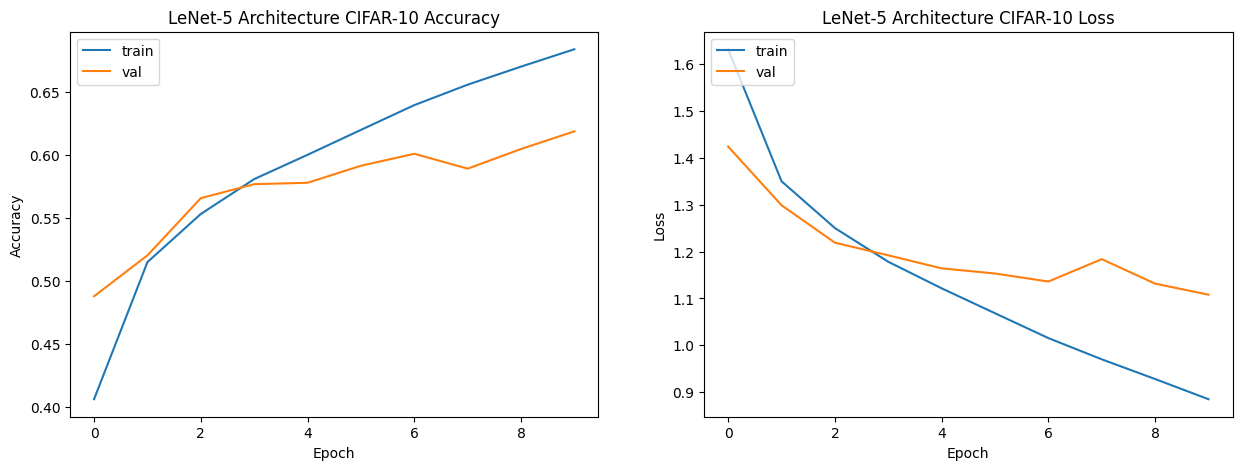

In [21]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(cifar_history.history['accuracy'])
plt.plot(cifar_history.history['val_accuracy'])
plt.title('LeNet-5 Architecture CIFAR-10 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(cifar_history.history['loss'])
plt.plot(cifar_history.history['val_loss'])
plt.title('LeNet-5 Architecture CIFAR-10 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [22]:
print('Accuracy Score =',round(np.max(cifar_history.history['val_accuracy']) * 100, 2) , '%')

Accuracy Score = 61.86 %


### Confusion Matrix

In [24]:
cm2 = confusion_matrix(cifar_ytest, model2_perdict)
cm2

array([[650,  49,  73,  25,  29,  13,  23,  31,  58,  49],
       [ 23, 758,  21,  16,   4,   9,  16,   8,  30, 115],
       [ 56,   8, 540,  78, 108,  81,  73,  29,  11,  16],
       [ 16,  12,  95, 389,  80, 213, 112,  43,  10,  30],
       [ 19,   8, 114,  56, 557,  50,  96,  78,  11,  11],
       [ 12,   4,  85, 173,  63, 531,  57,  58,   5,  12],
       [  6,  13,  65,  60,  62,  33, 733,   9,   7,  12],
       [ 12,   6,  28,  54, 101,  76,  22, 675,   1,  25],
       [107,  65,  27,  32,  16,  13,  15,   6, 672,  47],
       [ 22, 132,  10,  28,  12,  17,  24,  35,  39, 681]])

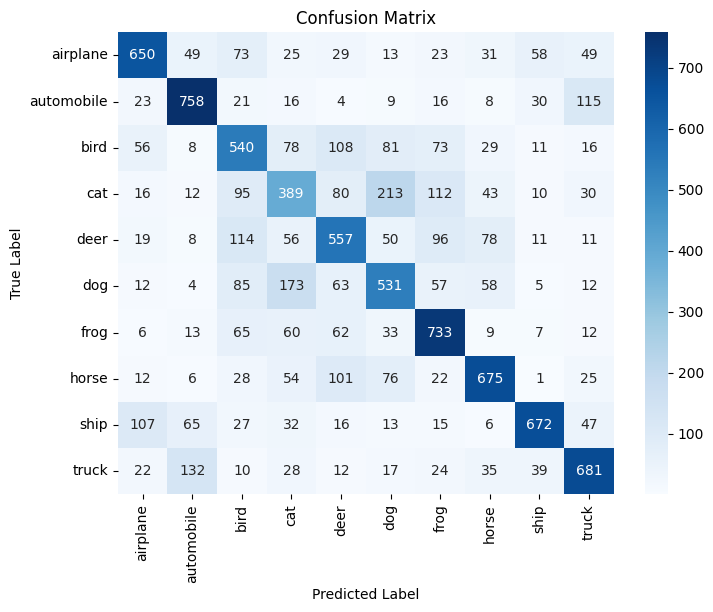

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Precision, recall, f1-score

In [29]:
print(classification_report(cifar_ytest, model2_perdict))

              precision    recall  f1-score   support



           0       0.70      0.65      0.68      1000

           1       0.72      0.76      0.74      1000

           2       0.51      0.54      0.52      1000

           3       0.43      0.39      0.41      1000

           4       0.54      0.56      0.55      1000

           5       0.51      0.53      0.52      1000

           6       0.63      0.73      0.68      1000

           7       0.69      0.68      0.68      1000

           8       0.80      0.67      0.73      1000

           9       0.68      0.68      0.68      1000



    accuracy                           0.62     10000

   macro avg       0.62      0.62      0.62     10000

weighted avg       0.62      0.62      0.62     10000




# **Conclusion**
LeNet-5 is a very efficient convolutional neural network for handwritten character recognition (MNIST) dataset, as it has better accuracy.

LeNet-5 works better with grayscale data than colored(RGB).
- MNIST Dataset Achieved Accuracy Score = 99.01 %
- CIFAR-10 Dataset Achieved Accuracy Score = 61.86 %
